In [ ]:
!pip install ultralytics==8.0.196
from ultralytics import YOLO

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
model = YOLO('/content/runs/detect/train6/weights/best.pt')
results = model.predict(source='/content/intensivities-2.png', conf=0.5)


image 1/1 /content/intensivities-2.png: 384x640 (no detections), 25.7ms
Speed: 1.9ms preprocess, 25.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
#!pip install roboflow --quiet

#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uVdHqPsxwL1Bu0JeIuJU")
project = rf.workspace("md-thoufeeq").project("doc-nurse")
version = project.version(5)
dataset = version.download("yolov8")




mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from IPython.display import display, Image

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


100%|██████████| 104k/104k [00:00<00:00, 45.0MB/s]
image 1/1 /content/datasets/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.50 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/doc-nurse--5/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=F

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.0/78.2 GB disk)


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


/content


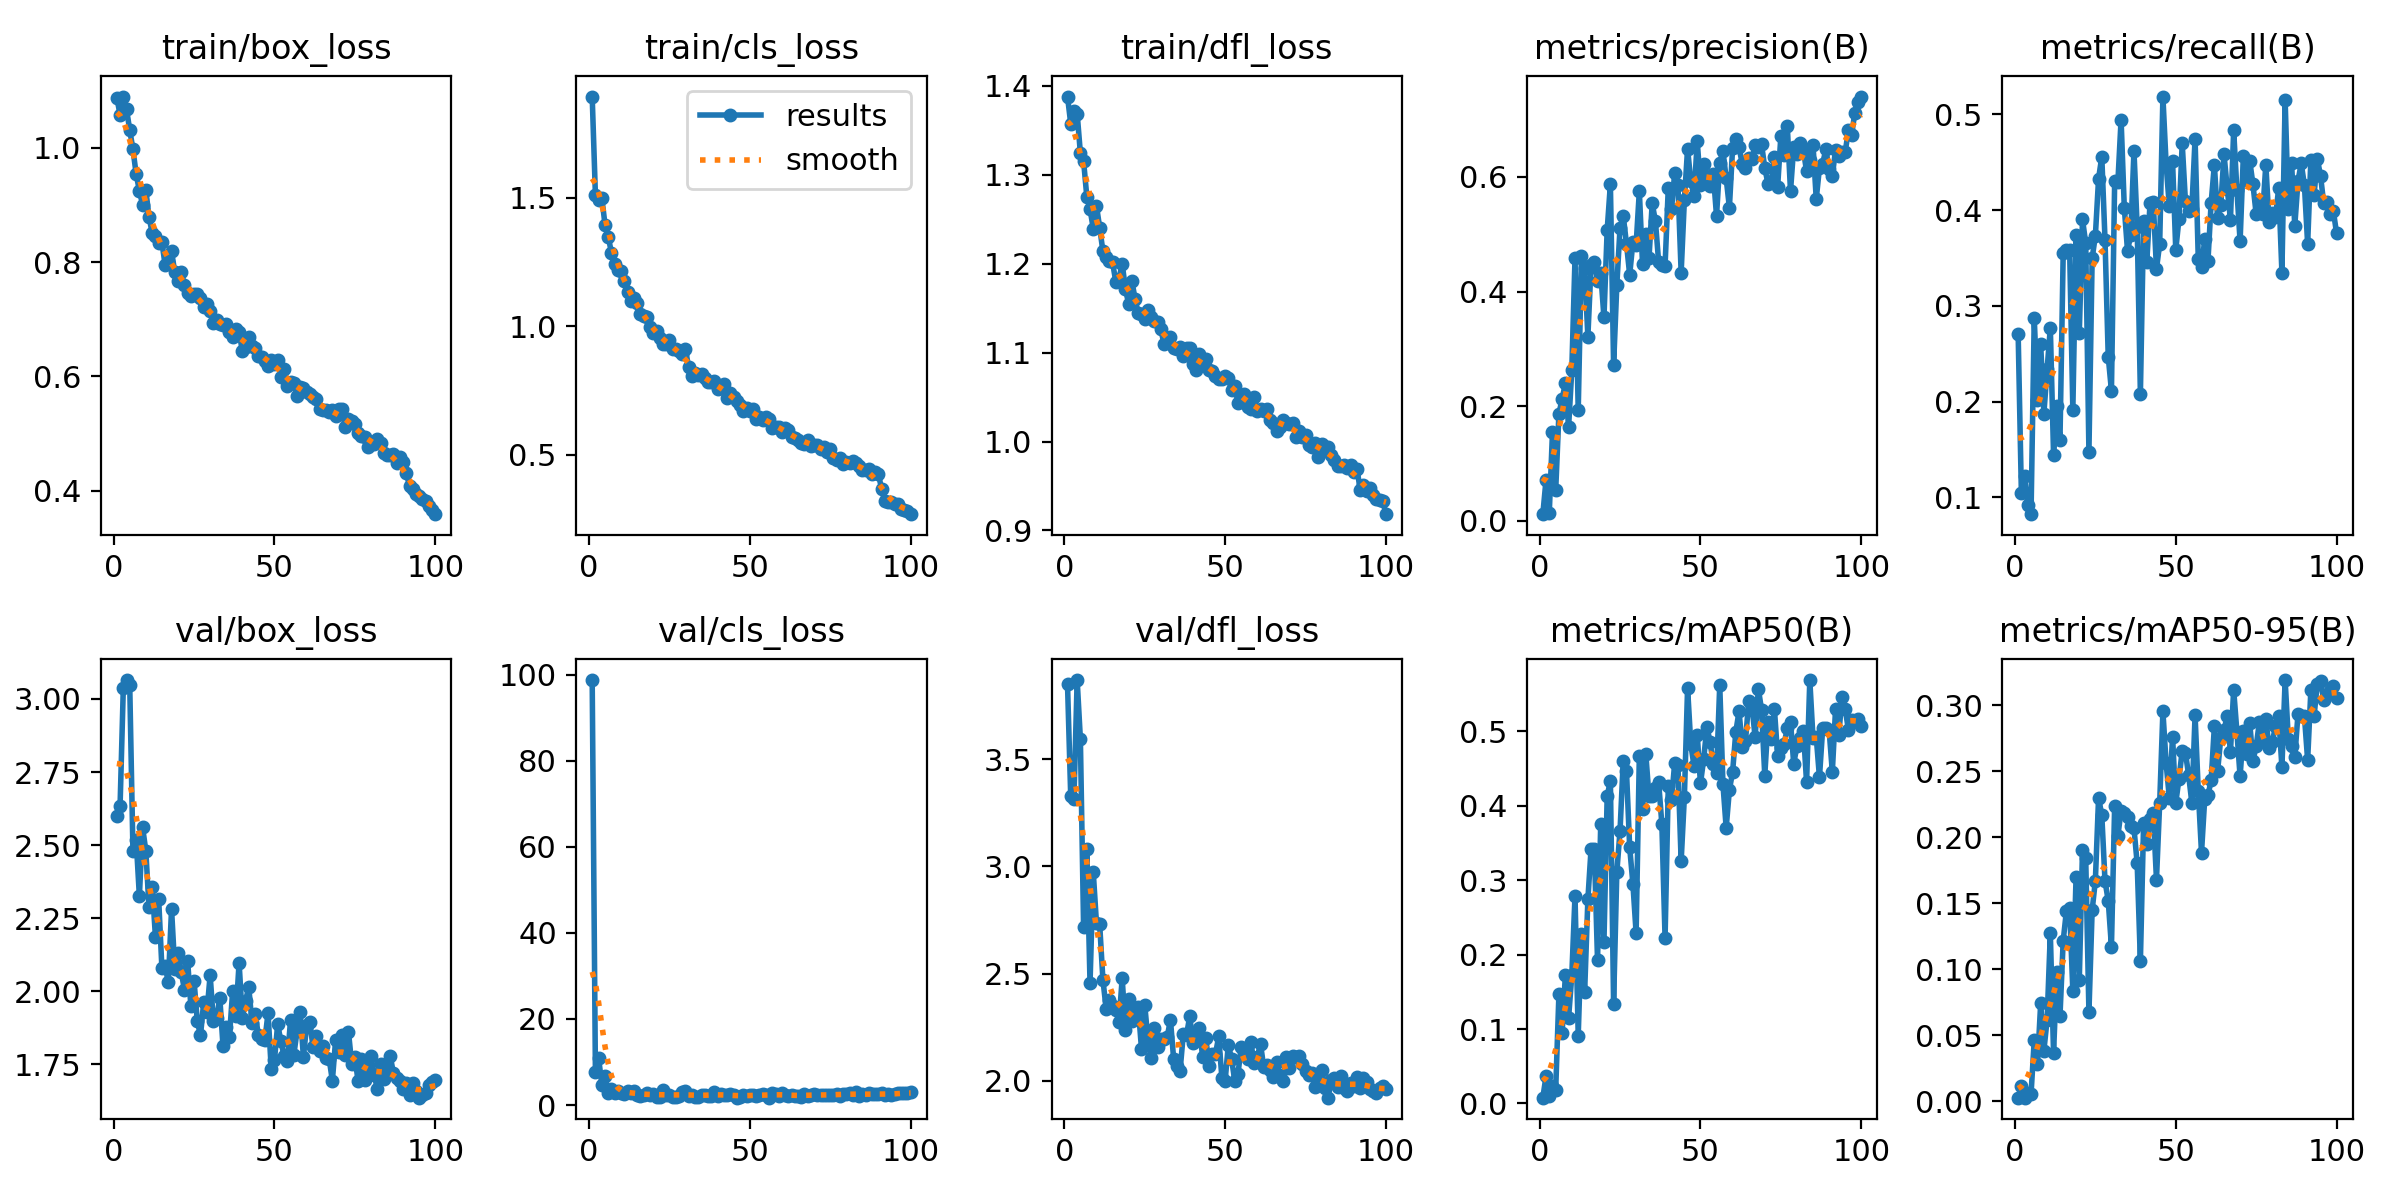

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

/content


VALIDATION

for 2000 dataset

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/doc-nurse--5/valid/labels.cache... 186 images, 2 backgrounds, 0 corrupt: 100% 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:08<00:00,  1.39it/s]
                   all        186        337      0.629      0.513      0.569       0.32
                Doctor        186        117      0.566      0.657      0.656      0.382
                 Nurse        186        220      0.692      0.368      0.483      0.258
Speed: 1.7ms preprocess, 22.7ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


for 39 dataset

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/doc-nurse--5/valid/labels.cache... 186 images, 2 backgrounds, 0 corrupt: 100% 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:09<00:00,  1.31it/s]
                   all        186        337      0.693      0.288      0.183     0.0625
                     -        186        117          1          0     0.0214    0.00772
               doctors        186        220      0.386      0.575      0.345      0.117
Speed: 1.9ms preprocess, 10.8ms inference, 0.1ms loss, 15.0ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


for 2000 dataset
INference

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.45 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/95 /content/datasets/doc-nurse--5/test/images/1_212-contract-nurses-made-permanent-in---_jpg.rf.00f2e428c506912d6cea459324af070b.jpg: 640x640 (no detections), 37.0ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/95 /content/datasets/doc-nurse--5/test/images/3_969-Indian-Nurse-Photos---Free-----3-_jpg.rf.7abecbf63183915d933eedb992fb8e33.jpg: 640x640 2 Doctors, 37.2ms
image 3/95 /content/datasets/doc-nurse--5/test/images/A-British-Nurse--In-a-blue-uniform-royalty-free-stock-image_jpg.rf.59a15c8eae539e8d5f6152ea6b5e25ce.jpg: 640x640 1 Nurse, 37.1ms
image 4/95 /content/datasets/doc-nurse--5/test/images/ANI-on-Twitter_-_Tamil-Nadu_-Nurses-at-----1-_jpg.rf.5ef1daf902b8a5f5332ca98fe107dbe3.jpg: 640x640 (no detections), 37.0ms
image 5/95 /content/datasets/doc-nurse--5/test/images/Annai-Veilankanni-Nursing-

RESULT

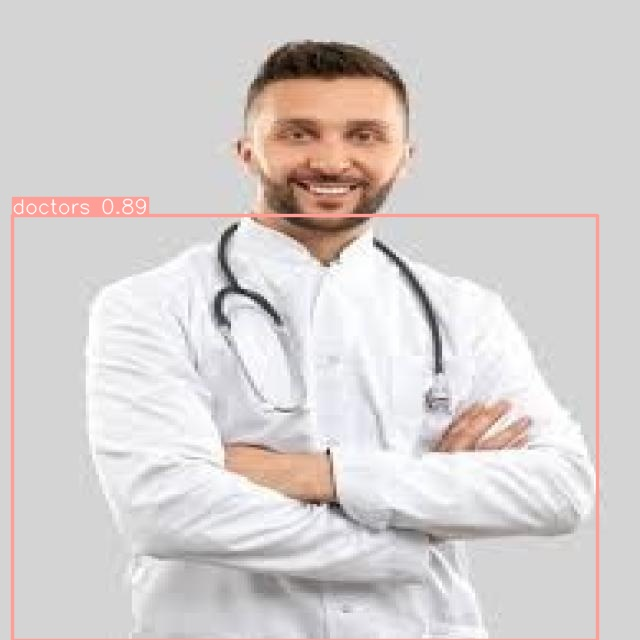

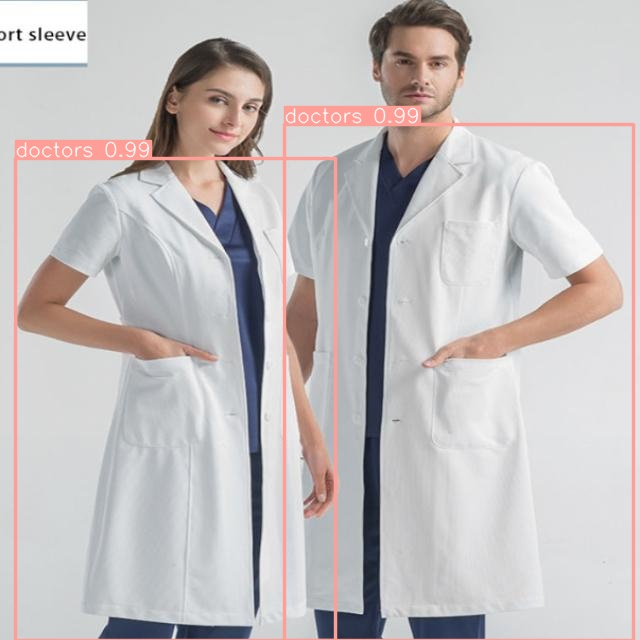

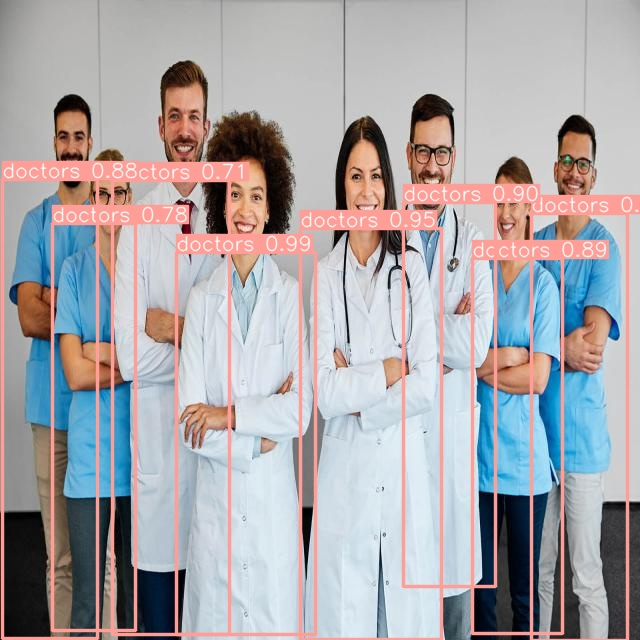

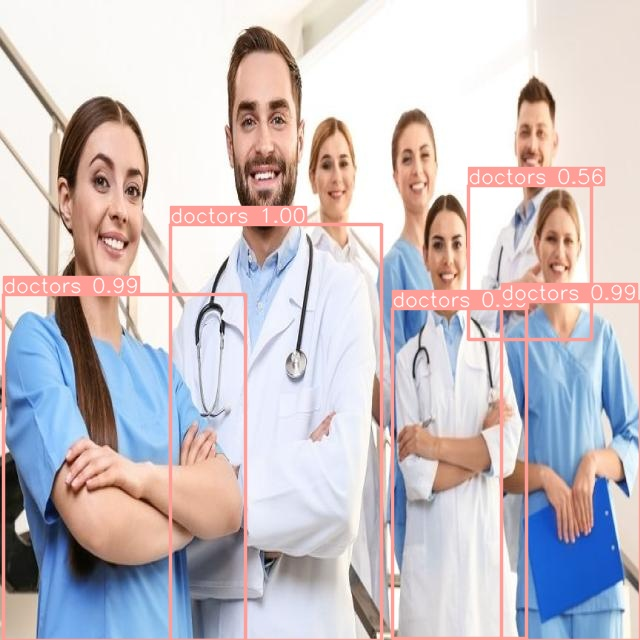

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

RESULT FOR 2000 DATASET

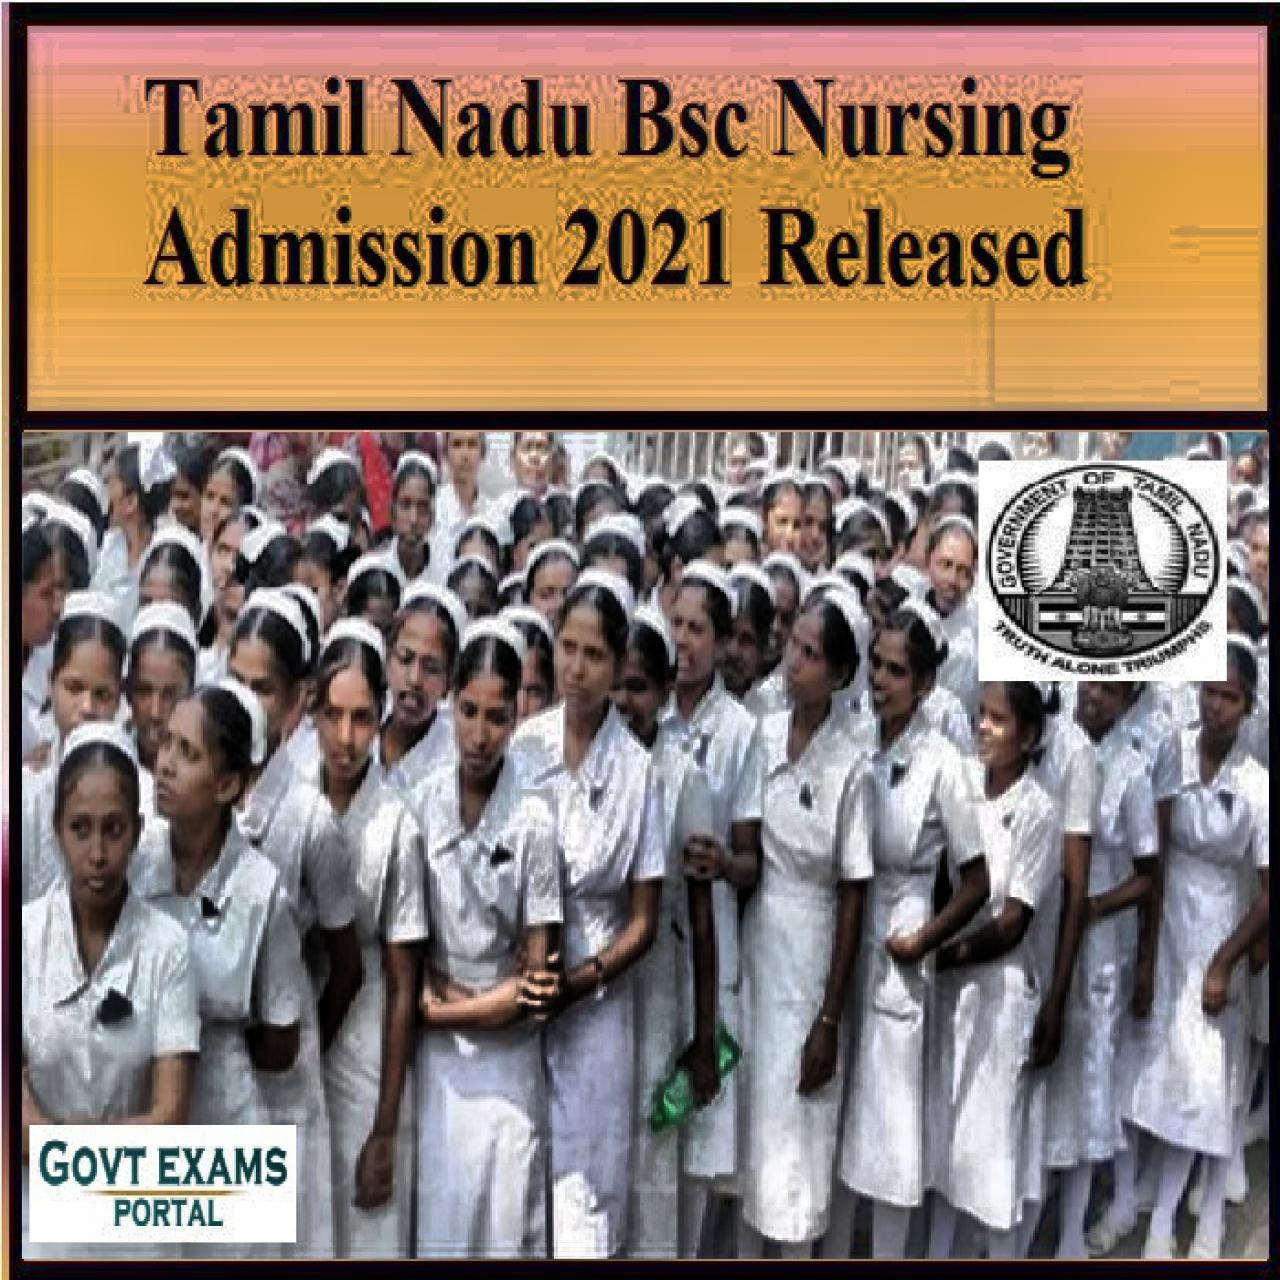

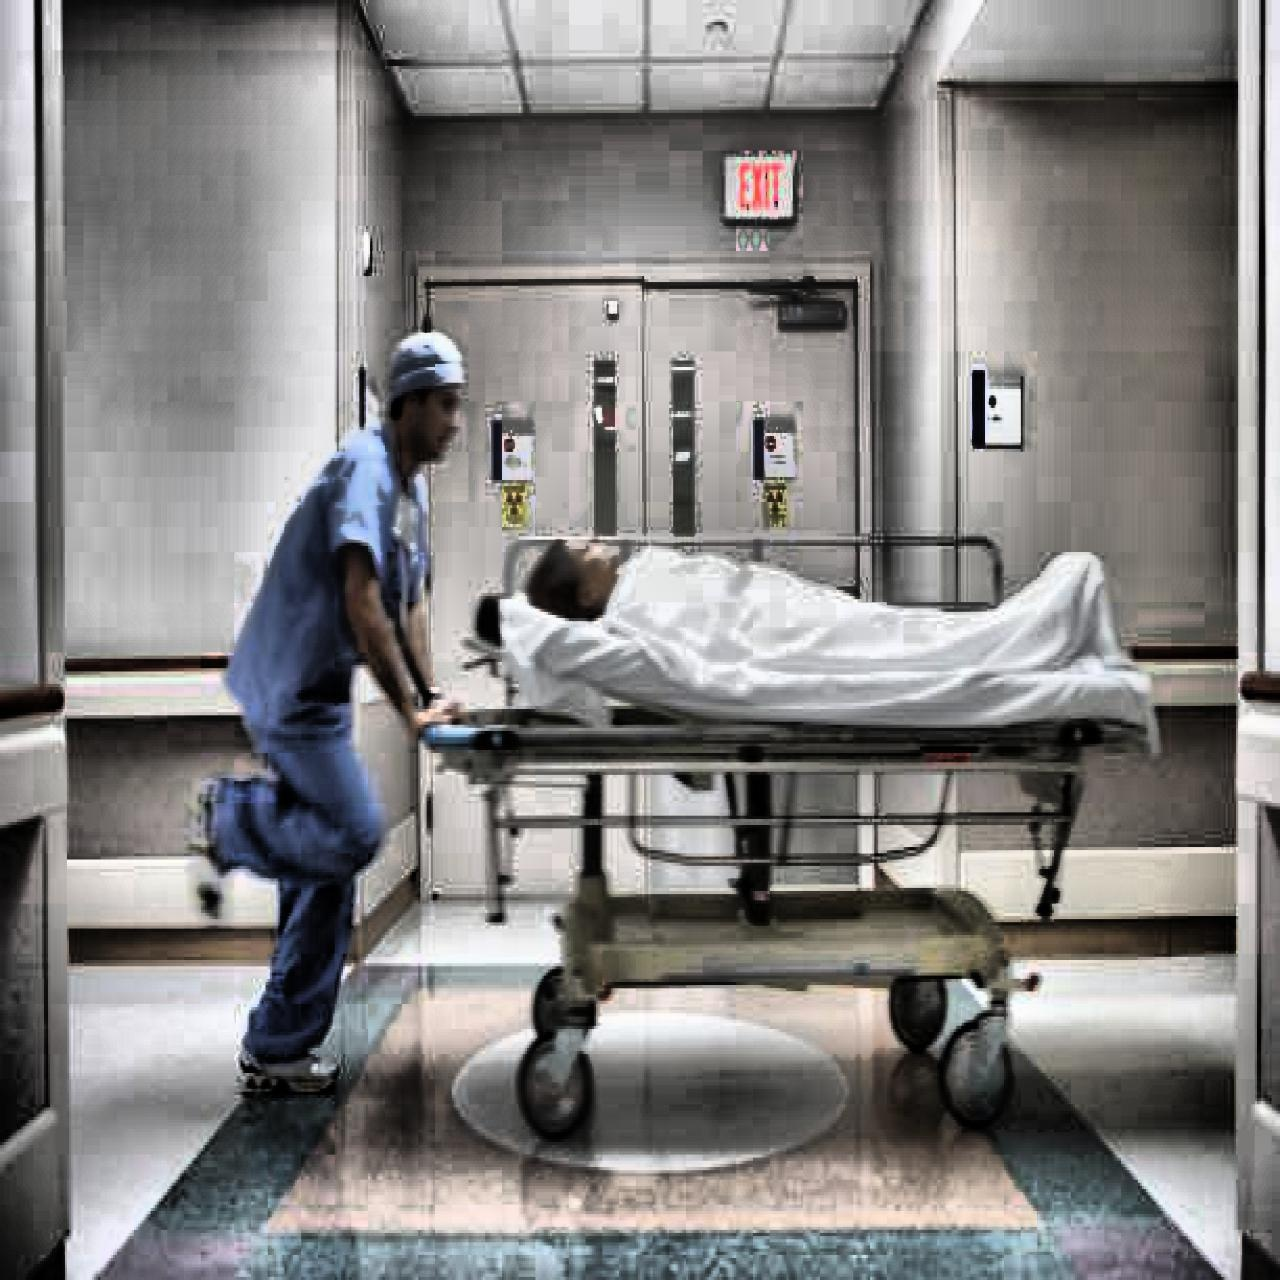

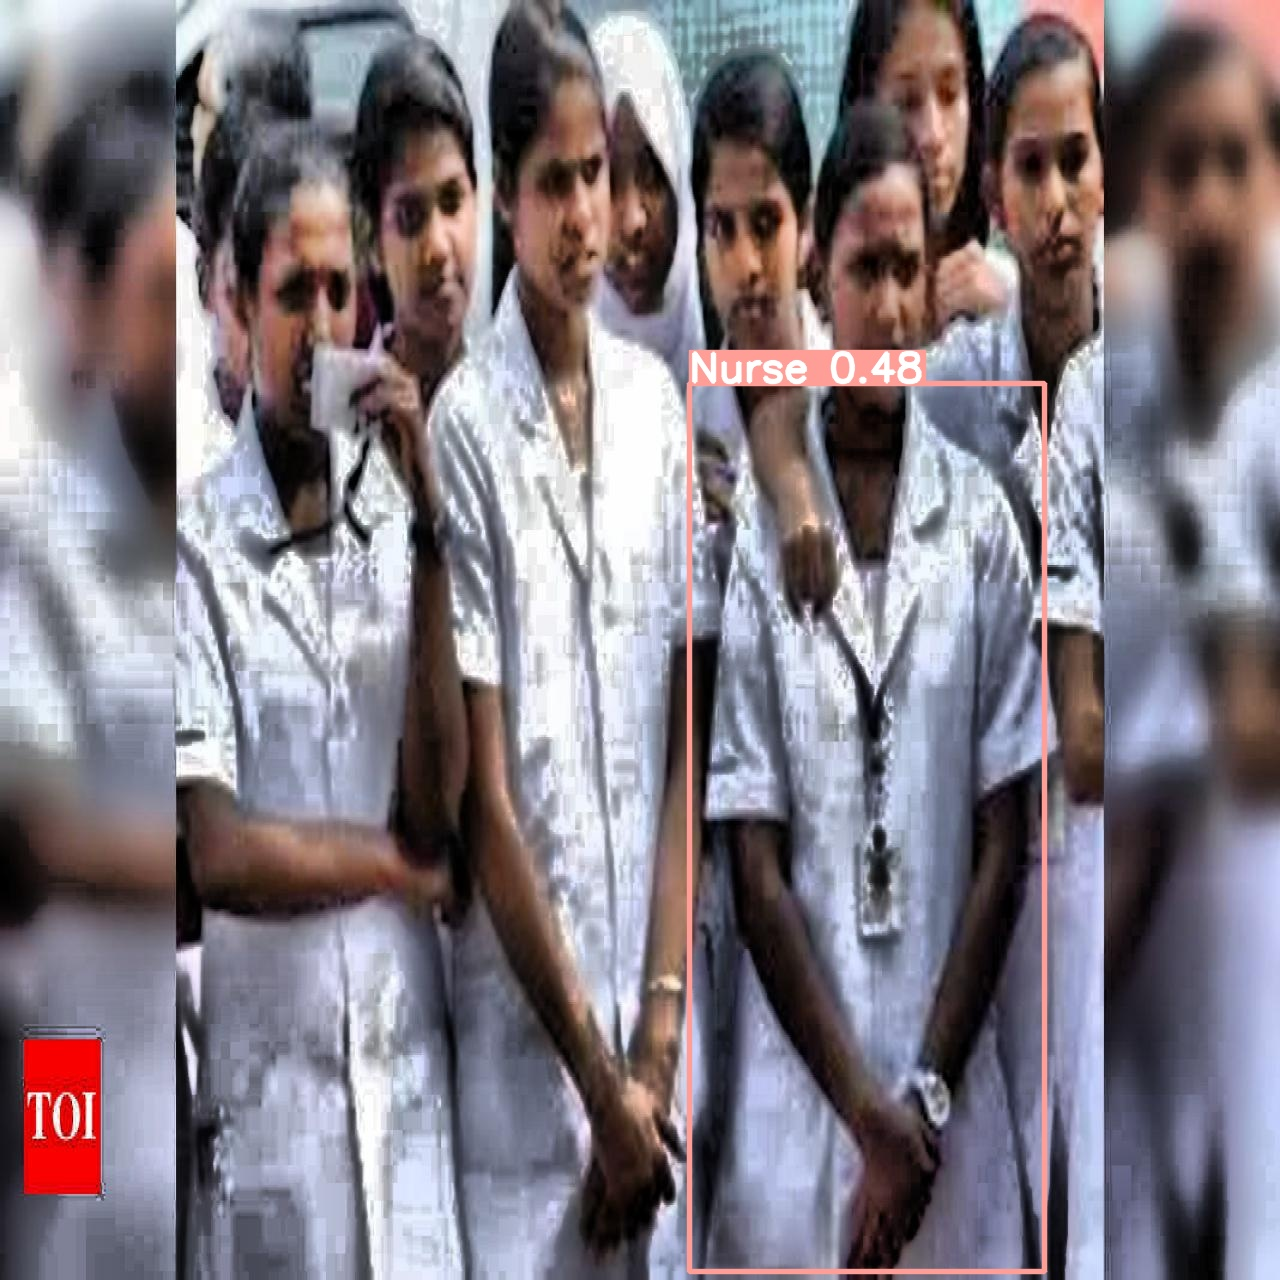

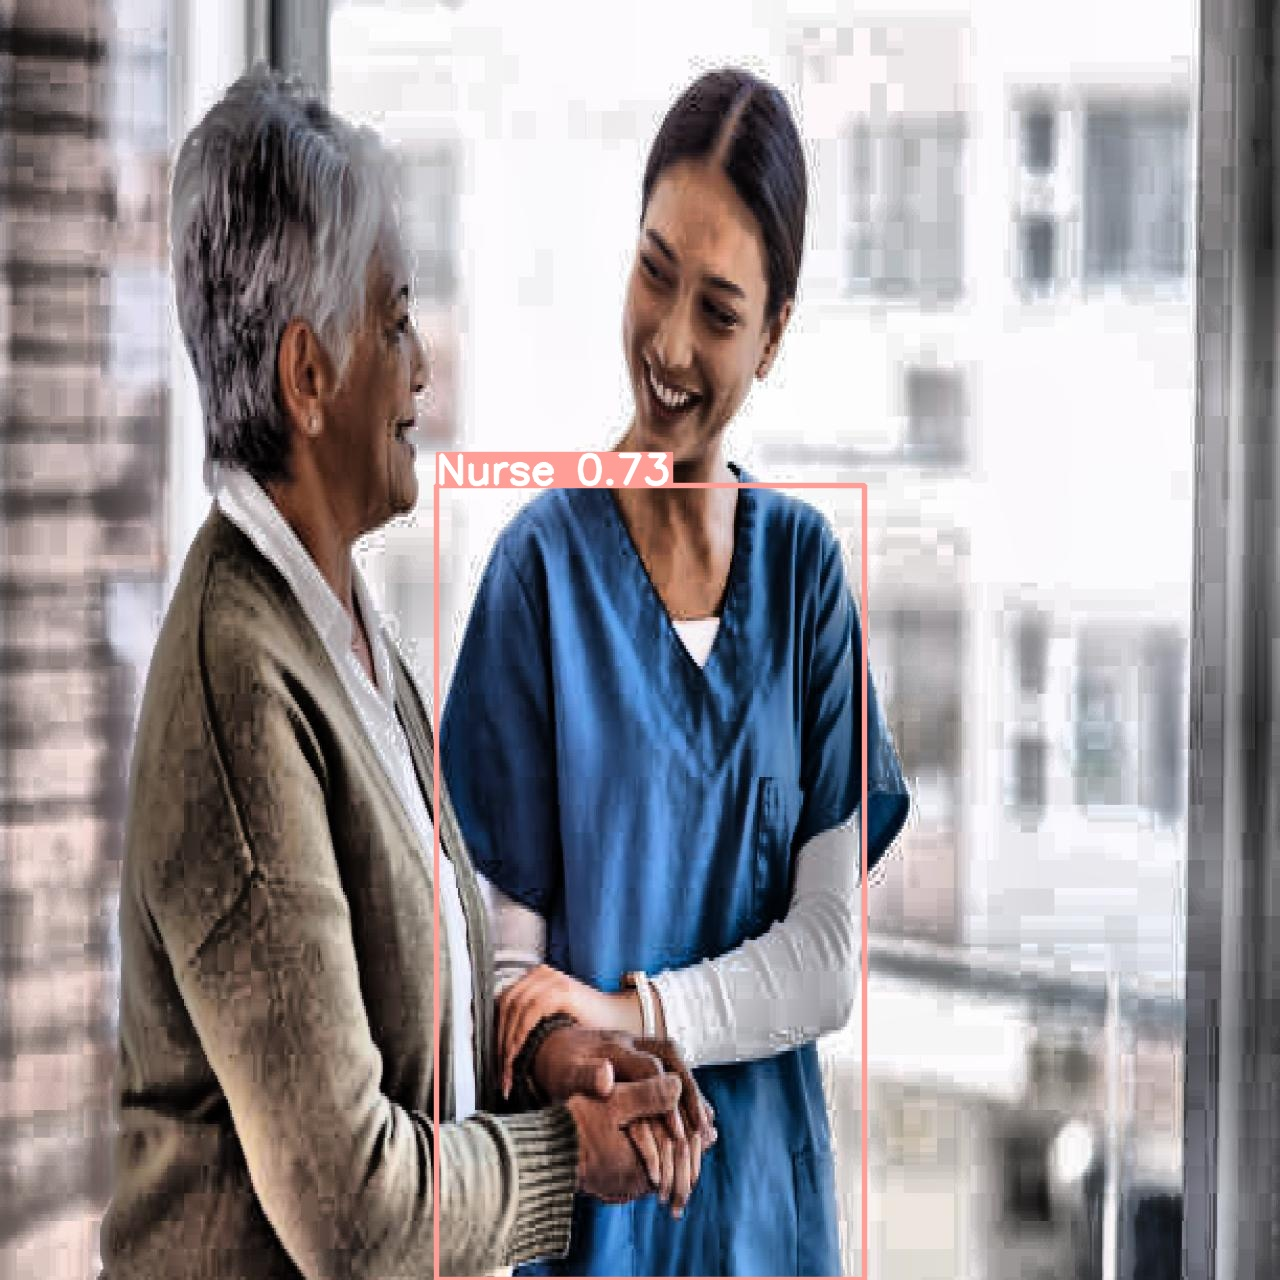

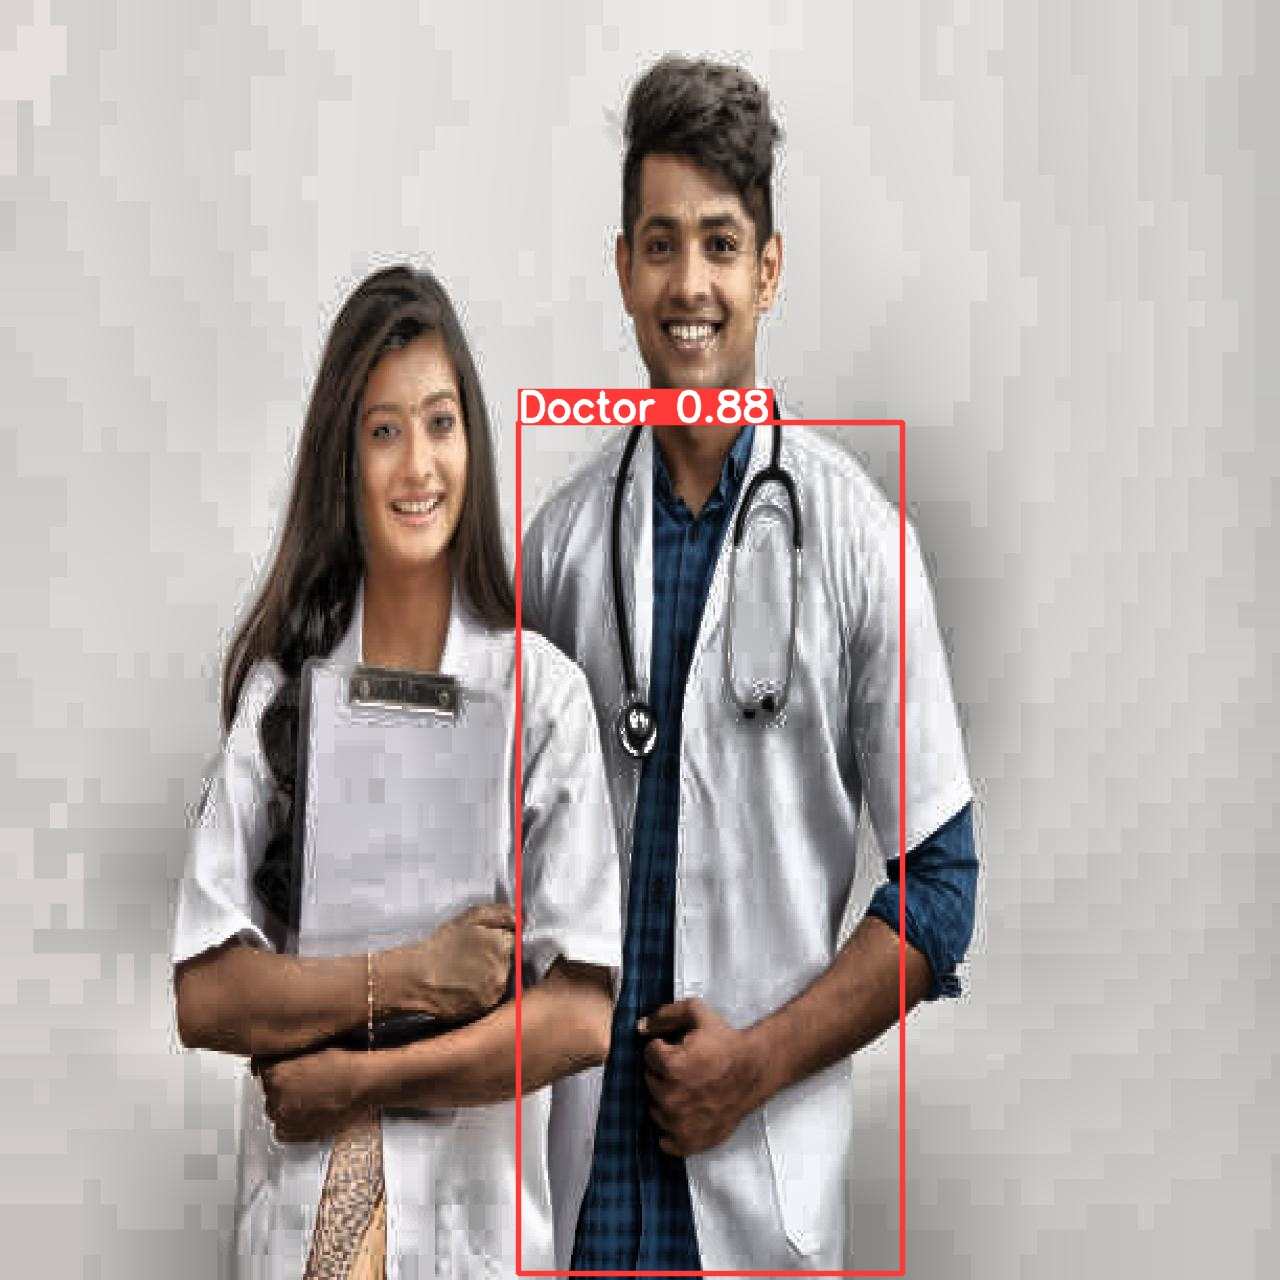

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")